In [14]:
# ランダムウォーク
class Location(object):
    def __init__(self, x, y):
        """xとyは浮動小数点数"""
        self.x, self.y = x, y
    
    def move(self, deltaX, deltaY):
        """deltaXとdeltaYは浮動小数点数"""
        return Location(self.x + deltaX, self.y + deltaY)
    
    def getX(self):
        return self.x
    
    def getY(self):
        return self.y
    
    def distFrom(self, other):
        ox, oy = other.x, other.y
        xDist, yDist = self.x - ox, self.y -oy
        return (xDist**2 + yDist**2)**0.5 # 平方根
    
    def __str__(self):
        return '<' + str(self.x) + ', ' + str(self.y) + '>'
    
class Field(object):
    def __init__(self):
        self.drunks = {}
        
    def addDrunk(self, drunk, loc):
        if drunk in self.drunks:
            raise ValueError('Duplicate drunk')
        else:
            self.drunks[drunk] = loc
    
    def moveDrunk(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        xDist, yDist = drunk.takeStep()
        currentLocation = self.drunks[drunk]
        # Locationクラスのmoveメソッドを用いて、新しい位置情報を得る
        self.drunks[drunk] = currentLocation.move(xDist, yDist)
        
    def getLoc(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        return self.drunks[drunk]
    
class oddField(Field):
    def __init__(self, numHoles, xRange, yRange):
        Field.__init__(self)
        self.wormholes = {}
        for w in range(numHoles):
            x = random.randint(-xRange, xRange)
            y = random.randint(-yRange, yRange)
            newX = random.randint(-xRange, xRange)
            newY = random.randint(-yRange, yRange)
            newLoc = Location(newX, newY)
            self.wormholes[(x, y)] = newLoc
    
    def moveDrunk(self, drunk):
        Field.moveDrunk(self, drunk)
        x = self.drunks[drunk].getX()
        y = self.drunks[drunk].getY()
        if (x, y) in self.wormholes:
            self.drunks[drunk] = self.wormholes[(x, y)]

In [2]:
import random

class Drunk(object):
    def __init__(self, name=None):
        """nameは文字列とする"""
        self.name = name
    
    def __str__(self):
        if self != None:
            return self.name
        return 'Anonymous'
    
class UsualDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0,1), (0,-1), (1,0), (-1,0)]
        return random.choice(stepChoices)

class ColdDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0.0, 1.0), (0.0, -2.0), (1.0, 0.0), (-1.0, 0.0)]
        return random.choice(stepChoices)

class EWDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(1.0, 0.0), (-1.0, 0.0)]
        return random.choice(stepChoices)

In [3]:
def walk(f, d, numSteps):
    """f: Fieldクラスのオブジェクト
        d: Drunkクラスのオブジェクト
        numSteps: 0以上の整数
        dをnumSteps回移動し、酔歩の初期位置と最終位置との差を出力する"""
    start = f.getLoc(d)
    for s in range(numSteps):
        f.moveDrunk(d)
    return start.distFrom(f.getLoc(d))

def simWalks(numSteps, numTrials, dClass):
    """numSteps: 0以上の整数
        numTrials: 正の整数
        dClass: Drunkのサブクラス
        numSteps回移動する酔歩を、numTrials回シミュレートする
        各実験の初期位置と最終位置との差をリストにして出力する"""
    Homer = dClass()
    origin = Location(0, 0)
    distances = []
    for t in range(numTrials):
        f = Field()
        f.addDrunk(Homer, origin)
        distances.append(round(walk(f, Homer, numSteps), 1))
    return distances

def drunkTest(walkLengths, numTrials, dClass):
    """walkLengths: 0以上の整数のシーケンス
        numTrials: 正の整数
        dClass: Drunkのサブクラス
        walkLengthsの各要素を酔歩の移動回数としてnumTrials回の酔歩を
        シミュレートするsimWalksを実行し、結果を出力する"""
    for numSteps in walkLengths:
        distances = simWalks(numSteps, numTrials, dClass)
        print(dClass.__name__, 'random walk of', numSteps, 'steps')
        print(' Mean =', round(sum(distances)/len(distances), 4))
        print(' Max =', max(distances), 'Min =,', min(distances))
        # pylab.clf()
        # pylab.plot(distances)
        # pylab.show()
drunkTest((10, 100, 1000, 10000), 10, UsualDrunk)

UsualDrunk random walk of 10 steps
 Mean = 2.43
 Max = 5.1 Min =, 0.0
UsualDrunk random walk of 100 steps
 Mean = 7.17
 Max = 14.4 Min =, 1.4
UsualDrunk random walk of 1000 steps
 Mean = 31.06
 Max = 49.5 Min =, 17.0
UsualDrunk random walk of 10000 steps
 Mean = 76.83
 Max = 124.3 Min =, 21.3


In [4]:
def simAll(drunkKinds, walkLength, numTrials):
    for dClass in drunkKinds:
        drunkTest(walkLength, numTrials, dClass)

simAll((UsualDrunk, ColdDrunk, EWDrunk), (100, 1000), 10)

UsualDrunk random walk of 100 steps
 Mean = 7.44
 Max = 14.4 Min =, 4.0
UsualDrunk random walk of 1000 steps
 Mean = 36.27
 Max = 64.1 Min =, 3.2
ColdDrunk random walk of 100 steps
 Mean = 27.37
 Max = 50.4 Min =, 4.5
ColdDrunk random walk of 1000 steps
 Mean = 264.56
 Max = 341.2 Min =, 209.0
EWDrunk random walk of 100 steps
 Mean = 8.8
 Max = 22.0 Min =, 0.0
EWDrunk random walk of 1000 steps
 Mean = 14.4
 Max = 36.0 Min =, 0.0


Starting simulation of UsualDrunk
Starting simulation of 10 steps
Starting simulation of 100 steps
Starting simulation of 1000 steps
Starting simulation of 10000 steps
Starting simulation of 100000 steps
Starting simulation of ColdDrunk
Starting simulation of 10 steps
Starting simulation of 100 steps
Starting simulation of 1000 steps
Starting simulation of 10000 steps
Starting simulation of 100000 steps
Starting simulation of EWDrunk
Starting simulation of 10 steps
Starting simulation of 100 steps
Starting simulation of 1000 steps
Starting simulation of 10000 steps
Starting simulation of 100000 steps


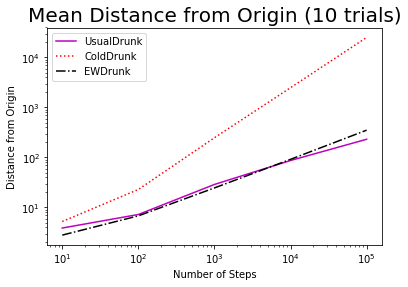

In [5]:
import pylab

class styleIterator(object):
    def __init__(self, styles):
        self.index = 0
        self.styles = styles
    
    def nextStyle(self):
        result = self.styles[self.index]
        if self.index == len(self.styles) - 1:
            self.index = 0
        else:
            self.index += 1
        return result

def simDrunk(numTrials, dClass, walkLengths):
    meanDistances = []
    for numSteps in walkLengths:
        print('Starting simulation of', numSteps, 'steps')
        trials = simWalks(numSteps, numTrials, dClass)
        mean = sum(trials)/len(trials)
        meanDistances.append(mean)
    return meanDistances

def simAll1(drunkKinds, walkLengths, numTrials):
    styleChoice = styleIterator(('m-', 'r:', 'k-.'))
    pylab.clf()
    pylab.rcParams['axes.titlesize'] = 20
    for dClass in drunkKinds:
        curStyle = styleChoice.nextStyle()
        print('Starting simulation of', dClass.__name__)
        means = simDrunk(numTrials, dClass, walkLengths)
        pylab.plot(walkLengths, means, curStyle, label = dClass.__name__)
        pylab.title('Mean Distance from Origin (' + str(numTrials) + ' trials)')
        pylab.xlabel('Number of Steps')
        pylab.ylabel('Distance from Origin')
        pylab.legend(loc = 'best')
        pylab.semilogx()
        pylab.semilogy()
    pylab.show()

simAll1((UsualDrunk, ColdDrunk, EWDrunk), (10, 100, 1000, 10000, 100000), 10)        

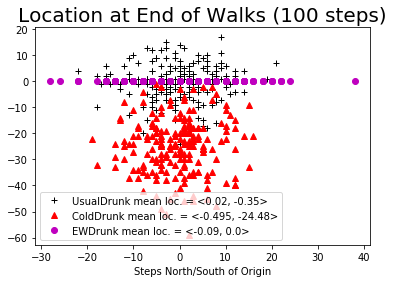

In [6]:
def getFinalLocs(numSteps, numTrials, dClass):
    locs = []
    d = dClass()
    for t in range(numTrials):
        f = Field()
        f.addDrunk(d, Location(0, 0))
        for s in range(numSteps):
            f.moveDrunk(d)
        locs.append(f.getLoc(d))
    return locs

def plotLocs(drunkKinds, numSteps, numTrials):
    styleChoice = styleIterator(('k+', 'r^', 'mo'))
    pylab.clf()
    for dClass in drunkKinds:
        locs = getFinalLocs(numSteps, numTrials, dClass)
        xVals, yVals = [], []
        for loc in locs:
            xVals.append(loc.getX())
            yVals.append(loc.getY())
        meanX = round(sum(xVals)/len(xVals), 4)
        meanY = round(sum(yVals)/len(yVals), 4)
        curStyle = styleChoice.nextStyle()
        pylab.plot(xVals, yVals, curStyle,
                  label = dClass.__name__ + ' mean loc. = <'\
                  + str(meanX) + ', ' + str(meanY) + '>')
    pylab.title('Location at End of Walks (' + str(numSteps) + ' steps)')
    pylab.xlabel('Steps East/West of Origin')
    pylab.xlabel('Steps North/South of Origin')
    pylab.legend(loc = 'lower left')
    pylab.show()

plotLocs((UsualDrunk, ColdDrunk, EWDrunk), 100, 200)

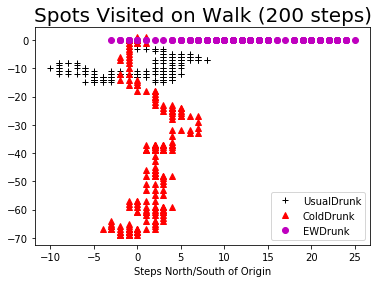

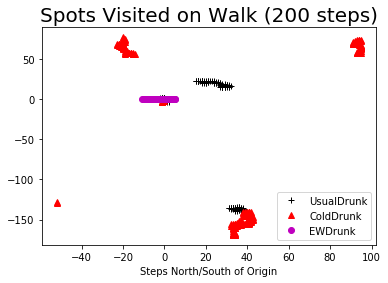

In [17]:
def traceWalk(drunkKinds, numSteps, field = None):
    styleChoice = styleIterator(('k+', 'r^', 'mo'))
    pylab.clf()
    if field == None:
        f = Field()
    else:
        f = field
    for dClass in drunkKinds:
        d = dClass()
        f.addDrunk(d, Location(0, 0))
        locs = []
        for s in range(numSteps):
            f.moveDrunk(d)
            locs.append(f.getLoc(d))
        xVals, yVals = [], []
        for loc in locs:
            xVals.append(loc.getX())
            yVals.append(loc.getY())
        curStyle = styleChoice.nextStyle()
        pylab.plot(xVals, yVals, curStyle, label = dClass.__name__)
    pylab.title('Spots Visited on Walk (' + str(numSteps) + ' steps)')
    pylab.xlabel('Steps East/West of Origin')
    pylab.xlabel('Steps North/South of Origin')
    pylab.legend(loc = 'best')
    pylab.show()

traceWalk((UsualDrunk, ColdDrunk, EWDrunk), 200)
traceWalk((UsualDrunk, ColdDrunk, EWDrunk), 200, oddField(1000, 100, 200))